Reading Data - summer

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
summer_athletes = pd.read_csv('Athletes_summer_games.csv', index_col=0)
# Time 0.4s

In [4]:
summer_athletes.head()

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [ ]:
# Zaplanowana analiza:
# Podział osób na płeć poniżej i powyżej średniej wieku chyba niemożliwe bo liczy się długo sprawdzić na mniejszej liczbie danych
######### Wyświetlić liczbę osób w zależności od lat, tak żeby podliczyć a następnie kilka box plot lub zwykły słupkowy
# Wyświetlić liczbę osób przeznaczoną na każdy kraj, w ddanym roku, wybrać konkretne igrzyska
######### Liczba osób biorących udział w igrzystach w danym mieście (suma)
# Wyświetlić jakiś wykres dyscyplin
# Medale zrobić wykres medali w zależności od lat, najlepiej od razu podział na złote, srebrne, brązowe na lata wielki wykres słupkowy, Wykluczyć NaN
# Wyświetlić listę zawodników z Polski i w jakich dyscyplinach brali udział oraz jakie zdobyte medale, podliczyć medale
########## W jakiej dycyplinie brał udział najstarszy zawodnik a w jakiej najmłodszy ogółem
########## Najmłodszy i najstarszy zawodnik w danym roku

In [4]:
summer_athletes.info()
# Time 0.2s

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237673 entries, 0 to 15120
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    237673 non-null  object 
 1   Sex     237673 non-null  object 
 2   Age     228484 non-null  float64
 3   Team    237673 non-null  object 
 4   NOC     237673 non-null  object 
 5   Games   237673 non-null  object 
 6   Year    237673 non-null  int64  
 7   Season  237673 non-null  object 
 8   City    237673 non-null  object 
 9   Sport   237673 non-null  object 
 10  Event   237673 non-null  object 
 11  Medal   36537 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 23.6+ MB


In [5]:
print('summer_athletes shape:',summer_athletes.shape)

# Time 0.0s

summer_athletes shape: (237673, 12)


In [6]:
summer_athletes.describe()

# Time 0.0s

,Age,Year
count,228484.000000,237673.000000
mean,25.746267,1979.096246
std,6.638720,31.783967
min,10.000000,1896.000000
25%,21.000000,1960.000000
50%,25.000000,1988.000000
75%,29.000000,2004.000000
max,97.000000,2020.000000


United States         15382
Great Britain         10857
France                10559
Italy                  8575
Germany                7975
                      ...  
Diabolo St Maurice        1
Essen                     1
Breslau                   1
Hb-20                     1
Rambo                     1
Name: Team, Length: 1169, dtype: int64


<AxesSubplot:>

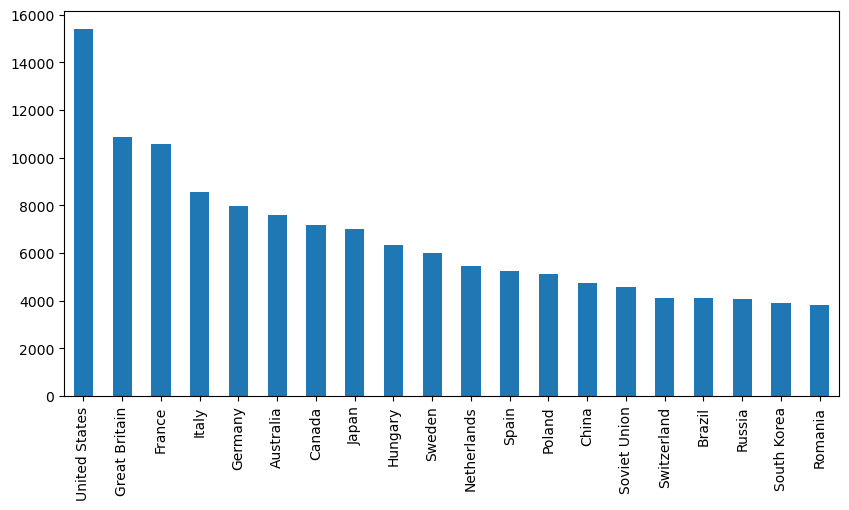

In [7]:
count_value_of_teams = summer_athletes['Team'].value_counts()
print(count_value_of_teams)
#To much number of Teams to plot everything so i plot first 20
count_value_of_teams.head(20).plot(kind='bar', figsize=(10,5))

# Time 0.2s

<AxesSubplot:>

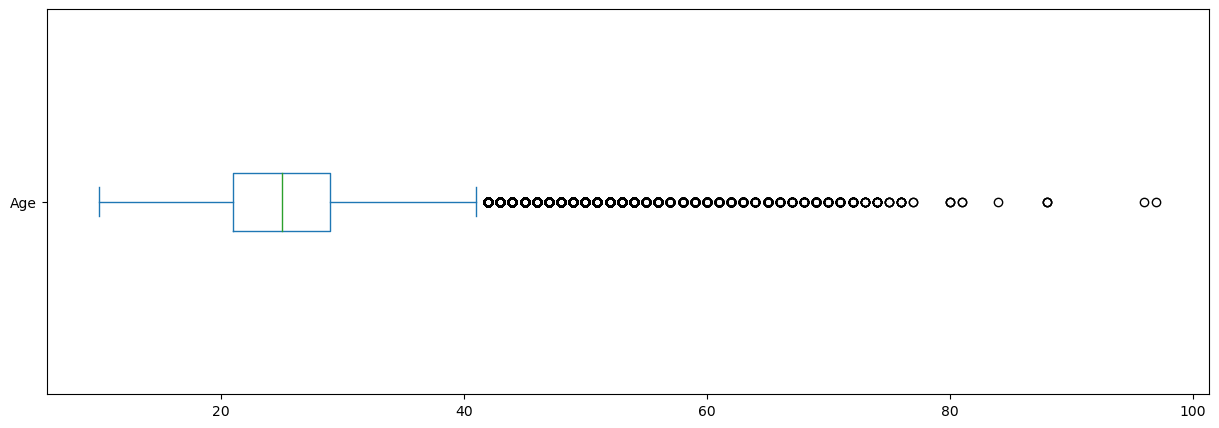

In [8]:
summer_athletes['Age'].plot(kind='box', vert=False, figsize=(15,5))

# Time 0.0s

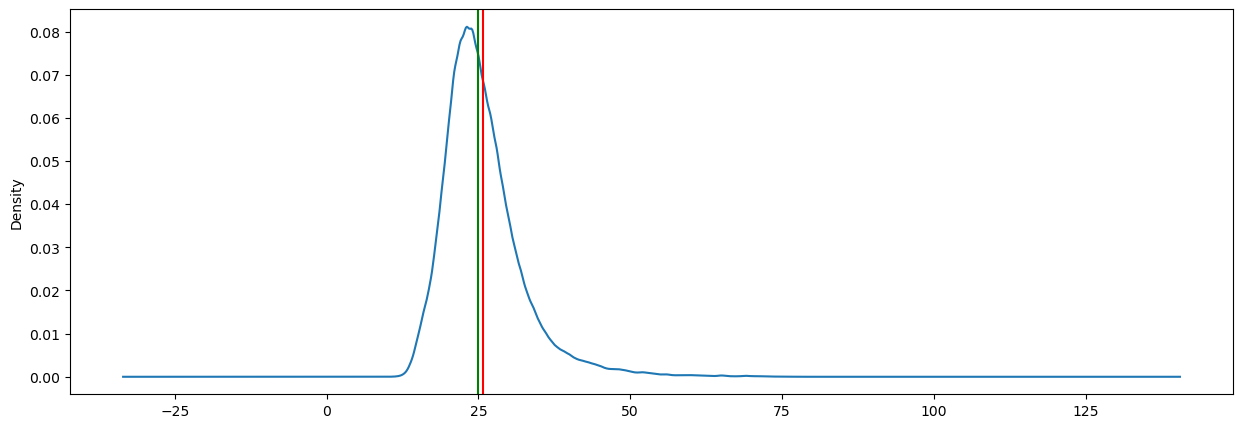

In [9]:
ax = summer_athletes['Age'].plot(kind='density', figsize=(15,5))
ax.axvline(summer_athletes['Age'].mean(), color='red')
ax.axvline(summer_athletes['Age'].median(), color='green')

# Time 8.6s

In [10]:
summer_athletes['Age'].mean()

# Time 0.0s

25.746266697011606

In [11]:
summer_athletes['Age'].median()

# Time 0.0s

25.0

In [12]:
summer_athletes.min()

# Time 0.2s

C:\Users\Kamila Nita\AppData\Local\Temp\ipykernel_14104\1087551993.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summer_athletes.min()


Name        Gabrielle Marie "Gabby" Adcock (White-)
Sex                                               F
Age                                            10.0
Team                                    30. Februar
NOC                                             AFG
Games                                   1896 Summer
Year                                           1896
Season                                       Summer
City                                      Amsterdam
Sport                                3x3 Basketball
Event                            10m Air Pistol Men
dtype: object

In [13]:
summer_athletes.max()

# Time 0.2s

C:\Users\Kamila Nita\AppData\Local\Temp\ipykernel_14104\147607368.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summer_athletes.max()


Name                                       zzet nce
Sex                                               M
Age                                            97.0
Team                                           rn-2
NOC                                             ZIM
Games                                   2020 Summer
Year                                           2020
Season                                       Summer
City                                          Tokyo
Sport                                     Wrestling
Event     Wrestling Women's Middleweight, Freestyle
dtype: object

<AxesSubplot:ylabel='Frequency'>

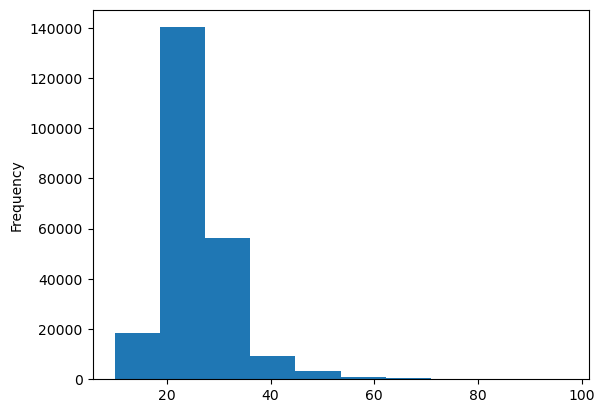

In [14]:
summer_athletes['Age'].plot(kind='hist')

# Time 0.1s

<AxesSubplot:xlabel='Year'>

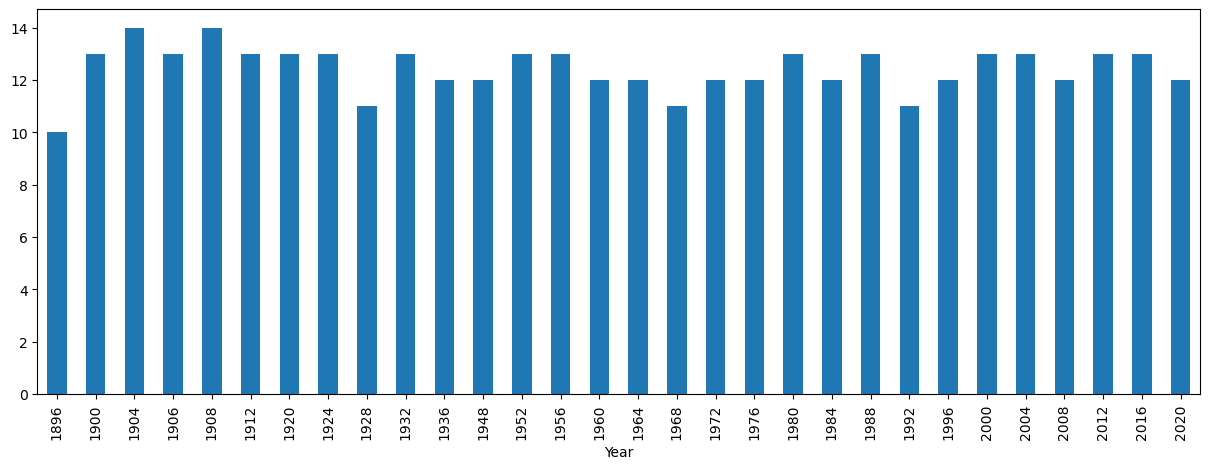

In [10]:
summer_athletes.groupby('Year')['Age'].min().plot(kind='bar', figsize=(15,5))

# Time 0.2s

<AxesSubplot:xlabel='Year'>

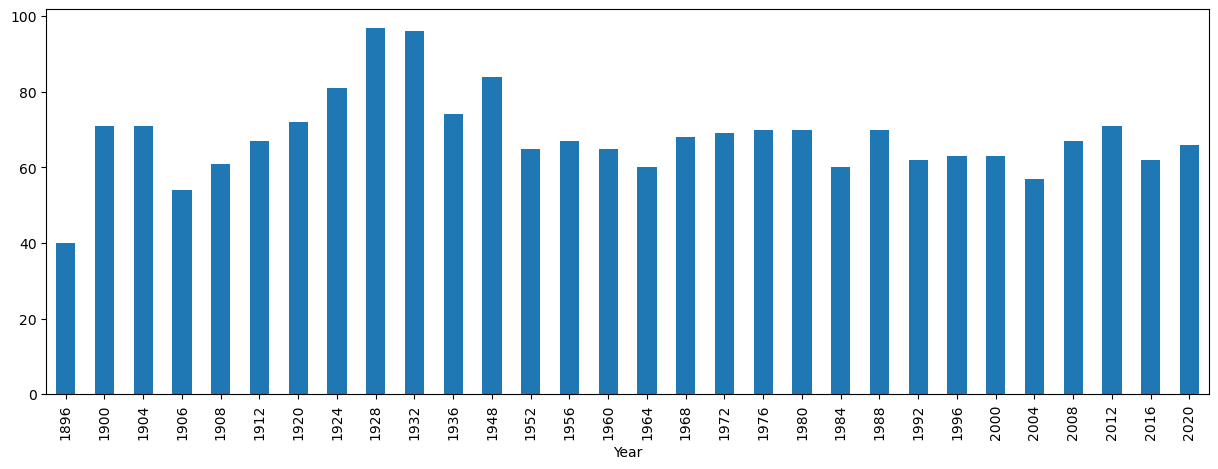

In [17]:
summer_athletes.groupby('Year')['Age'].max().plot(kind='bar', figsize=(15,5))

# Time 0.2s

In [18]:
corr = summer_athletes.corr() #Brak zgodności im bliżej jedynki tym lepiej, opisać jakoś otrzymane wyniki
corr

# Time 0.0s

,Age,Year
Age,1.000000,-0.106253
Year,-0.106253,1.000000


([<matplotlib.axis.YTick at 0x253f8f6d940>,
 [Text(0, 0, 'Age'), Text(0, 1, 'Year')])

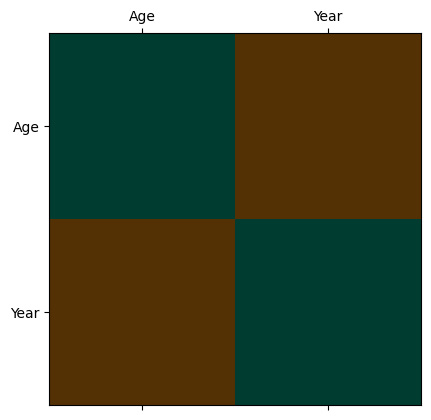

In [19]:
fig = plt.figure()
plt.matshow(corr, cmap='BrBG', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)

# Time 0.1s

In [17]:
summer_athletes['Sex'].value_counts()

# Time 0.0s

M    170964
F     66709
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

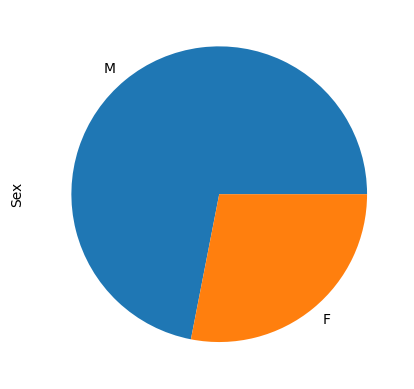

In [18]:
summer_athletes['Sex'].value_counts().plot(kind='pie')

# Time 0.1s

In [11]:
summer_athletes['Games'].value_counts()

# Time 0.0s

2020 Summer    15121
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
1992 Summer    12977
2012 Summer    12920
1988 Summer    12037
1972 Summer    10304
1984 Summer     9454
1976 Summer     8641
1968 Summer     8588
1952 Summer     8270
1960 Summer     8119
1964 Summer     7702
1980 Summer     7191
1936 Summer     6506
1948 Summer     6405
1924 Summer     5233
1956 Summer     5127
1928 Summer     4992
1920 Summer     4292
1912 Summer     4040
1908 Summer     3101
1932 Summer     2969
1900 Summer     1936
1906 Summer     1733
1904 Summer     1301
1896 Summer      380
Name: Games, dtype: int64

<AxesSubplot:>

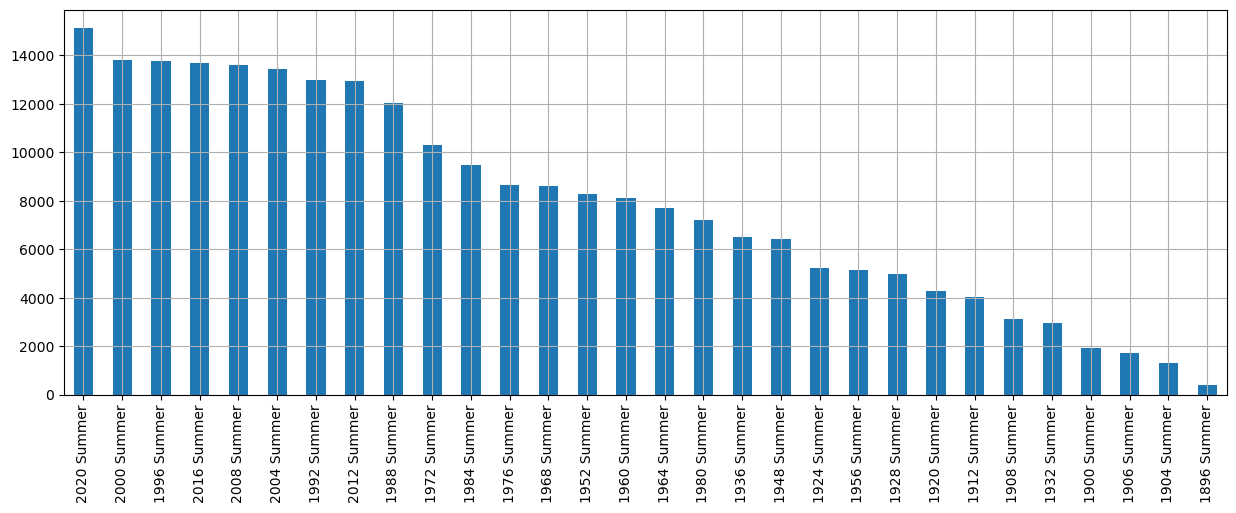

In [36]:
summer_athletes['Games'].value_counts().plot(kind='bar', figsize=(15,5), grid=True)

# Time 0.3s

In [25]:
summer_athletes['City'].value_counts()

# Time 0.0s

Tokyo             22823
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Beijing           13602
Barcelona         12977
Los Angeles       12423
Seoul             12037
Munich            10304
Montreal           8641
Mexico City        8588
Helsinki           8270
Roma               8119
Moskva             7191
Paris              7169
Berlin             6506
Amsterdam          4992
Melbourne          4829
Stockholm          4338
Antwerpen          4292
St. Louis          1301
Name: City, dtype: int64

<AxesSubplot:ylabel='City'>

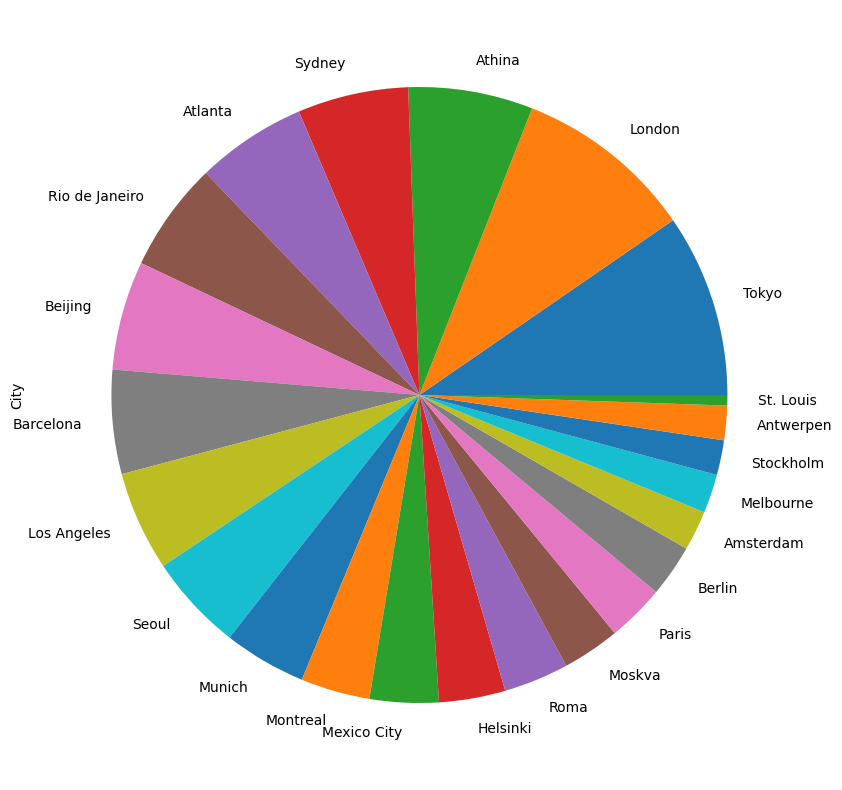

In [35]:
summer_athletes['City'].value_counts().plot(kind='pie', figsize=(10,10))

# Time 0.2s

In [32]:
summer_athletes.query("Games == '2020 Summer'")

,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,AALERUD Katrine,F,26.0,Norway,NOR,2020 Summer,2020,Summer,Tokyo,Cycling Road,Women's Road Race,NaN
1,AALERUD Katrine,F,26.0,Norway,NOR,2020 Summer,2020,Summer,Tokyo,Cycling Road,Women's Individual Time Trial,NaN
2,ABAD Nestor,M,28.0,Spain,ESP,2020 Summer,2020,Summer,Tokyo,Artistic Gymnastics,Men's All-Around,NaN
3,ABAD Nestor,M,28.0,Spain,ESP,2020 Summer,2020,Summer,Tokyo,Artistic Gymnastics,Men's Floor Exercise,NaN
4,ABAD Nestor,M,28.0,Spain,ESP,2020 Summer,2020,Summer,Tokyo,Artistic Gymnastics,Men's Pommel Horse,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN
15117,ZYKOVA Yulia,F,25.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver
15118,ZYUZINA Ekaterina,F,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Sailing,Women's One Person Dinghy - Laser Radial,NaN
15119,ZYZANSKA Sylwia,F,24.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Archery,Women's Individual,NaN
